# Relación de datos

In [2]:
from extract import get_all_heartpairs

BASE_DIR = './data'
heartpairs = get_all_heartpairs(BASE_DIR)
heartpairs[:3]

[(PosixPath('data/training-a/a0284.dat'),
  PosixPath('data/training-a/a0284.wav')),
 (PosixPath('data/training-a/a0290.dat'),
  PosixPath('data/training-a/a0290.wav')),
 (PosixPath('data/training-a/a0247.dat'),
  PosixPath('data/training-a/a0247.wav'))]

# ¿Cómo suena?

In [7]:
from random import randint
from pydub import AudioSegment

test = heartpairs[randint(0, len(heartpairs))]

pcg_test = AudioSegment.from_file(test[-1])
pcg_test

# ¿Cómo se ve?

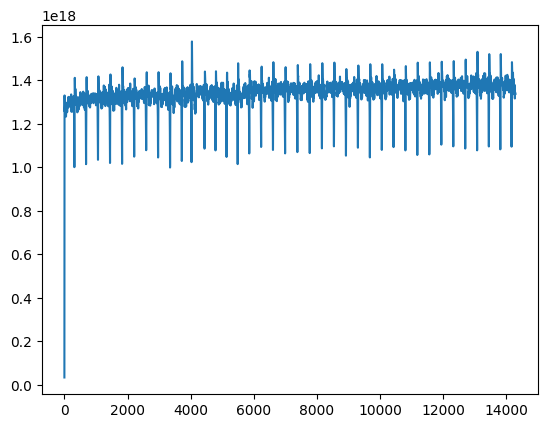

In [8]:
from numpy import fromfile, int64
from matplotlib.pyplot import plot

ecg = fromfile(test[0], dtype=int64)
plot(ecg)

In [14]:
from torch import Tensor
from typing import List, Tuple
from torch.utils.data import Dataset
from torchaudio import load as load_audio

class CoraTranslatorDataset(Dataset):
    def __init__(self, data_tuples: List[Tuple]) -> None:
        self.data_tuples = data_tuples

    def __len__(self) -> int:
        return len(self.data_tuples)
    
    def __getitem__(self, idx) -> Tuple:
        ecg_dir, pcg_dir = self.data_tuples[idx]

        ecg = fromfile(ecg_dir, dtype=int64)
        ecg = Tensor(ecg).reshape(1, -1)
        pcg, sample_rate = load_audio(pcg_dir)

        return pcg, ecg


In [15]:
translator_dataset = CoraTranslatorDataset(
    data_tuples=heartpairs,
)

print("Heartsignals: ", len(translator_dataset))

translator_dataset[5][0].shape, translator_dataset[5][1].shape

Heartsignals:  405


(torch.Size([1, 71750]), torch.Size([1, 17937]))